## Import required python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read Loan dataset file and store as a dataframe

In [2]:
df_base=pd.read_csv("loan.csv")
df_base.head() #observe dataframe by printing top 5 rows of the dataset

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
display(df_base.shape) #observe numbers of rows and columns in the dataframe

(39717, 111)

In [4]:
display(df_base.info()) #observe datatypes of different columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


None

## Data cleaning
### Step 1: Analyze and handle columns with >50% NULL values 

In [5]:
#Check % of NULL values in each column in the dataframe
100*df_base.isnull().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [6]:
#Filtering and displaying columns with more than 40% values as NULL
isnull_series=df_base.isnull().sum()
null_series=isnull_series[isnull_series>0]/len(df_base.index)*100 #identiy % of NULLs for each column
majority_nulls=pd.DataFrame(null_series[null_series.values>40]) #filter columns with more the 50% NULL
print("Outcome: Following columns has more than 40% NULL values. Hence, they need to be dropped")
display(majority_nulls)

Outcome: Following columns has more than 40% NULL values. Hence, they need to be dropped


,0
mths_since_last_delinq,64.662487
mths_since_last_record,92.985372
next_pymnt_d,97.129693
mths_since_last_major_derog,100.000000
annual_inc_joint,100.000000
dti_joint,100.000000
verification_status_joint,100.000000
tot_coll_amt,100.000000
tot_cur_bal,100.000000
open_acc_6m,100.000000


In [7]:
# Drop above listed columns from the dataframe and inspect the shape of resultant dataframe
df=df_base.dropna(thresh=df_base.shape[0]*0.4,how=all,axis=1) #drop column with more than 50% NA
display(df.shape) #inspect shape of resultant dataframe

(39717, 54)

In [8]:
#Inspect nature of columns in the resultant dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Step 2: Remove records with loan status as 'Current'
##### If loan is ongoing, it cannot give conclusive evidence for default or non-default. Hence such customers should not be considered.

In [9]:
# Delete current loans and inspect size of resultant dataset
df.drop(df[df['loan_status']=='Current'].index, inplace=True)
df.shape

(38577, 54)

### Step 3: Analyze and treat columns with all '0' values
#### 3.1 Remove columns having all zero values

In [10]:
# Inspect numerical columns from the dataframe
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,...,38577.000000,38577.000000,38577.000000,38521.0,38577.0,38577.0,38521.0,38577.0,37880.000000,38538.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,...,98.035545,12.772728,2746.243218,0.0,1.0,0.0,0.0,0.0,0.043479,0.0
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,...,698.650182,150.836853,4494.648131,0.0,0.0,0.0,0.0,0.0,0.204583,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,...,0.000000,0.000000,217.420000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,...,0.000000,0.000000,568.260000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,...,0.000000,0.000000,3447.250000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [11]:
# Display columns having more than 80%  values as zero
zero_series=df[~df.astype(bool)].count()
zero_columns=zero_series[zero_series>0]/len(df)*100
zero_columns[zero_columns>95]

out_prncp                     100.000000
out_prncp_inv                 100.000000
collections_12_mths_ex_med     99.854836
acc_now_delinq                100.000000
chargeoff_within_12_mths       99.854836
delinq_amnt                   100.000000
tax_liens                      99.898903
dtype: float64

In [12]:
# Remove columns with all values as zero
df.drop(['acc_now_delinq','delinq_amnt','out_prncp','out_prncp_inv'],axis=1,inplace=True)

# Inspect shape of resultant dataframe
display(df.shape)

(38577, 50)

#### 3.2 Remove columns having only zero and NULL values

In [13]:
# Inspect non-zero values in column 'collections_12_mths_ex_med'
df['collections_12_mths_ex_med'].value_counts() #This column has only zero and NULL values

0.0    38521
Name: collections_12_mths_ex_med, dtype: int64

In [14]:
# Inspect non-zero values in column 'chargeoff_within_12_mths'
df['chargeoff_within_12_mths'].value_counts() #This column has only zero and NULL values

0.0    38521
Name: chargeoff_within_12_mths, dtype: int64

In [15]:
# Inspect non-zero values in column 'tax_liens'
df['tax_liens'].value_counts() #This column has only zero and NULL values

0.0    38538
Name: tax_liens, dtype: int64

In [16]:
# Based on above analysis, remove column having only zero and NULL values
df.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],axis=1,inplace=True)

In [17]:
# Inspect the size of resultant dataframe
df.shape

(38577, 47)

### Step 4: Remove columns that cannot be used for explaining Dependent variable

In [18]:
# Referring to Data Dictionary, remove columns those do not exhibit any relation with the dependent variable
# - addr_state: Default/Non default will not be dependant on State of the borrower
# - zip_code: Default/Non default will not be dependant on zip code provided by the borrower
# - url: Default/Non default will not be dependant on application URL
df.drop(['zip_code','url'],axis=1,inplace=True)

In [19]:
# Referring to Data Dictionary, remove columns those do not exhibit any relation with the dependent variable
# - emp_title: Default/Non default will not be dependant on Employer name. There is no way to fill NULL values for employer.
# - desc: Default/Non default will not be dependant on description added for the loan. Loan type is available in other columns.
df.drop(['emp_title','desc'],axis=1,inplace=True)

In [20]:
# Inspect shape of resultant dataframe
df.shape

(38577, 43)

### Step 5: Remove columns that exhibit only one value

In [21]:
# Remove those column which have only one value
df['initial_list_status'].value_counts()

f    38577
Name: initial_list_status, dtype: int64

In [22]:
# Remove those column which have only one value
df['policy_code'].value_counts()

1    38577
Name: policy_code, dtype: int64

In [23]:
# Remove those column which have only one value
df['application_type'].value_counts()

INDIVIDUAL    38577
Name: application_type, dtype: int64

In [24]:
# Remove those column which have only one value
df['pymnt_plan'].value_counts()

n    38577
Name: pymnt_plan, dtype: int64

In [25]:
# Drop above 4 columns as they have only 1 value
df.drop(['initial_list_status','policy_code','pymnt_plan','application_type'],axis=1,inplace=True)

In [26]:
# Inspect the shape of resultant dataframe
df.shape

(38577, 39)

### Step 6: Drop unique identifiers from the dataset

In [27]:
# Drop unique identifiers as they would not contribute to the analysis
df.drop(['id','member_id'],axis=1,inplace=True)

In [28]:
df.shape

(38577, 37)

In [29]:
#create new dataframe with the data processed so far
df1=df
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


### Step 7: Formatting of column datatypes as per requirement

In [31]:
# Updating datatype of 12 select columns as Category which are to be used for  group by for further Analysis
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
df1[columns] = df1[columns].apply(lambda x: x.astype('category'))
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   loan_amnt                38577 non-null  int64   
 1   funded_amnt              38577 non-null  int64   
 2   funded_amnt_inv          38577 non-null  float64 
 3   term                     38577 non-null  object  
 4   int_rate                 38577 non-null  object  
 5   installment              38577 non-null  float64 
 6   grade                    38577 non-null  category
 7   sub_grade                38577 non-null  category
 8   emp_length               37544 non-null  object  
 9   home_ownership           38577 non-null  category
 10  annual_inc               38577 non-null  float64 
 11  verification_status      38577 non-null  category
 12  issue_d                  38577 non-null  object  
 13  loan_status              38577 non-null  category
 14  purpos

In [33]:
# Three columns namely int_rate, term and emp_length req cleaning 
df1['term']=df1['term'].str.rstrip('months')
df1['int_rate']=df1['int_rate'].str.rstrip('%')
type=['+ years','years','year', '+ Years','Years','Year']
for v in type:
    df1['emp_length']=df1['emp_length'].str.rstrip(v)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   loan_amnt                38577 non-null  int64   
 1   funded_amnt              38577 non-null  int64   
 2   funded_amnt_inv          38577 non-null  float64 
 3   term                     38577 non-null  object  
 4   int_rate                 38577 non-null  object  
 5   installment              38577 non-null  float64 
 6   grade                    38577 non-null  category
 7   sub_grade                38577 non-null  category
 8   emp_length               37544 non-null  object  
 9   home_ownership           38577 non-null  category
 10  annual_inc               38577 non-null  float64 
 11  verification_status      38577 non-null  category
 12  issue_d                  38577 non-null  object  
 13  loan_status              38577 non-null  category
 14  purpos

## Data imputation
### Step 1: Analyze columns having NULL or zero value from refined dataframe

In [34]:
#check for columns having NULL values
100*df1.isnull().mean()

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.028514
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.129611
total_acc                  0.000000
total_pymnt                0.000000
total_pymnt_inv            0

In [35]:
# List columns those would need data imputation
remaining_nulls=df1.isnull().sum()
remaining_null_series=remaining_nulls[remaining_nulls>0]/len(df1.index)*100 #identiy % of NULLs for each column
imputation_columns=pd.DataFrame(remaining_null_series[remaining_null_series.values>0]) #filter columns with NULL values
print("Outcome: Following columns still have NULL values. Hence, data imputation is required for these columns")
display(imputation_columns)

Outcome: Following columns still have NULL values. Hence, data imputation is required for these columns


,0
emp_length,2.677761
title,0.028514
revol_util,0.129611
last_pymnt_d,0.184047
last_credit_pull_d,0.005184
pub_rec_bankruptcies,1.806776


In [36]:
# Identify categorical columns having NULL values for data imputation
print('Outcome --> Following categorical columns require Data Imputation with the column-mode value')
imputation_columns_cat = df1[imputation_columns.index].select_dtypes(include=['object'])
display(imputation_columns_cat)

Outcome --> Following categorical columns require Data Imputation with the column-mode value


,emp_length,title,revol_util,last_pymnt_d,last_credit_pull_d
0,10,Computer,83.70%,Jan-15,May-16
1,< 1,bike,9.40%,Apr-13,Sep-13
2,10,real estate business,98.50%,Jun-14,May-16
3,10,personel,21%,Jan-15,Apr-16
5,3,My wedding loan I promise to pay back,28.30%,Jan-15,Jan-16
...,...,...,...,...,...
39712,4,Home Improvement,13.10%,Jul-10,Jun-10
39713,3,Retiring credit card debt,26.90%,Jul-10,Jul-10
39714,< 1,MBA Loan Consolidation,19.40%,Apr-08,Jun-07
39715,< 1,JAL Loan,0.70%,Jan-08,Jun-07


In [37]:
# Inspect unique values under 'title column'
df1['title'].value_counts()

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

In [38]:
# Drop 'title' column at it has too many unique values and same information can be extracted from 'Purpose' column as well.
df1.drop(['title'],axis=1,inplace=True)
df1.shape

(38577, 36)

### Step 2: Replace NULL values in categorical columns by mode of the column

In [39]:
# Replace NULL values in catogorical columns with column mode
df1['emp_length'].fillna(df1['emp_length'].mode()[0], inplace=True)
df1['revol_util'].fillna(df1['revol_util'].mode()[0], inplace=True)
df1['last_pymnt_d'].fillna(df1['last_pymnt_d'].mode()[0], inplace=True)
df1['last_credit_pull_d'].fillna(df1['last_credit_pull_d'].mode()[0], inplace=True)

### Step 3: Replace NULL values in numerical columns with column median

In [40]:
# Inspect for columns still having NULL values
print('Outcome --> Following numerical columns require Data Imputation with the column-median value')
remaining_nulls=100*df1.isnull().mean()
remaining_nulls_num=remaining_nulls[remaining_nulls>0] #filter columns with NULL values
imputation_columns_num=pd.DataFrame(remaining_nulls_num) #filter columns with NULL values
display(imputation_columns_num)

Outcome --> Following numerical columns require Data Imputation with the column-median value


,0
pub_rec_bankruptcies,1.806776


In [47]:
# Replace NULL values in numerical column with column median
df1['pub_rec_bankruptcies'].fillna(df1['pub_rec_bankruptcies'].mode()[0], inplace=True)

In [49]:
# Final inspection: Check if there are any columns remaining with NULL values
remaining_nulls = 100*df1.isnull().mean()
remaining_nulls_series_final = remaining_nulls[remaining_nulls>0]
display(remaining_nulls_series_final)

Series([], dtype: float64)

In [50]:
# Create new dataframe with cleaned data
df_final=df1
df_final.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


## Exploratory Data Analysis
### Inspect target variable and convert to numerical format: 'Fully Paid'=1 and 'Charged Off'=0

In [51]:
# Check distribution of target variable
df_final['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [52]:
# convert target variable in to numerical format
df_final['loan_status']=df_final['loan_status'].map({'Fully Paid':1,'Charged Off':0})

### Univariate Analysis
#### Inspect distribution of values under various categorical columns

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

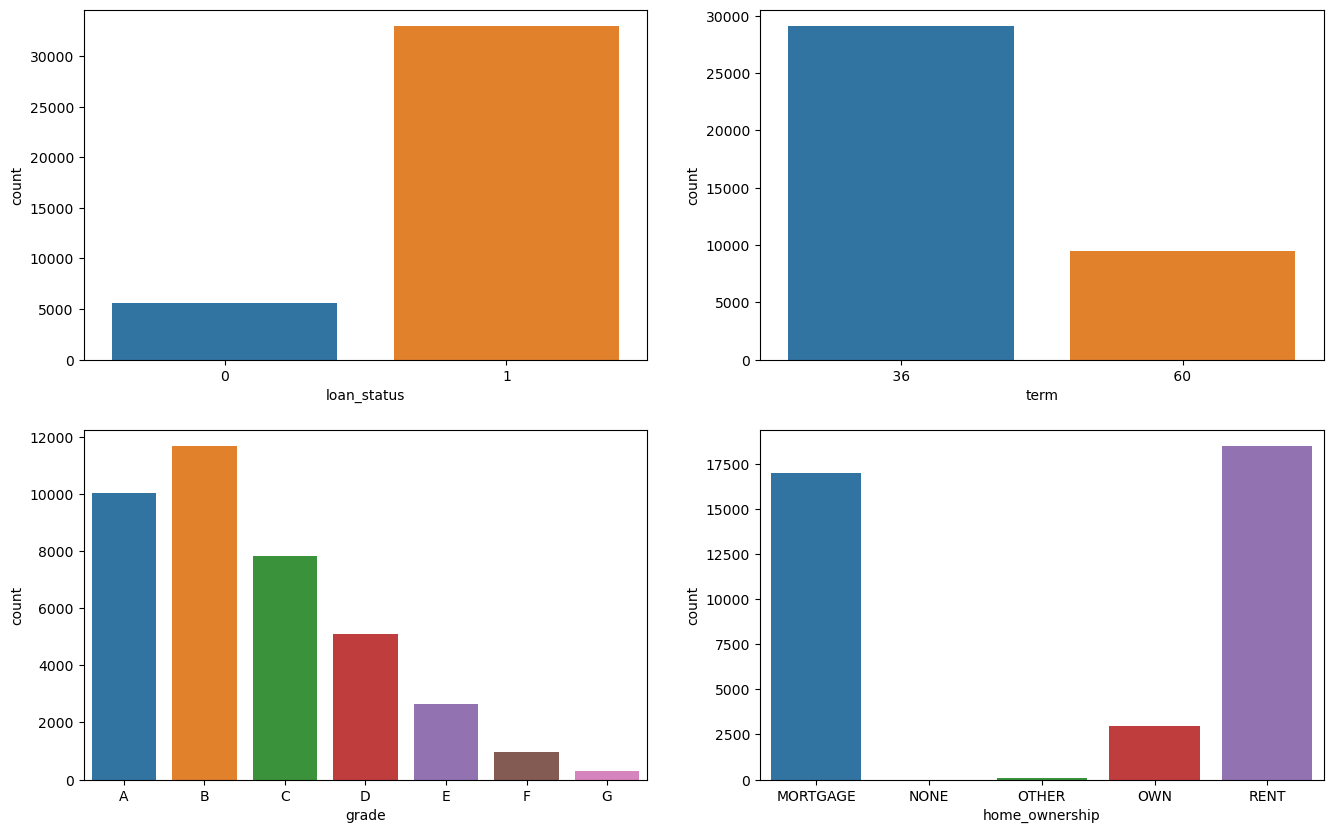

In [53]:
# Inspect distribution of various categorical variables
fig,ax=plt.subplots(2,2,figsize=(16,10))
sns.countplot('loan_status',data=df_final,ax=ax[0][0])
sns.countplot('term',data=df_final,ax=ax[0][1])
sns.countplot('grade',data=df_final,ax=ax[1][0])
sns.countplot('home_ownership',data=df_final,ax=ax[1][1])

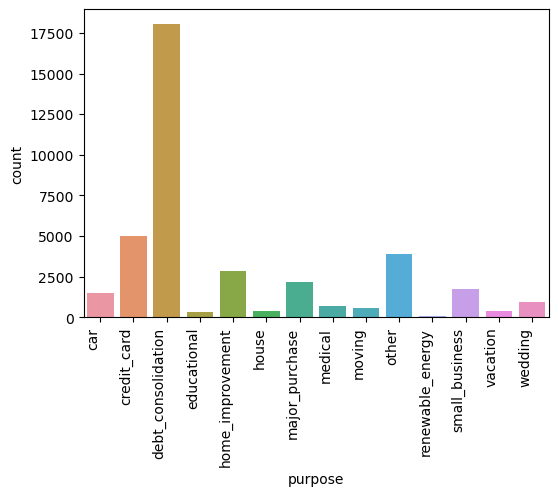

In [54]:
# Inspect distribution of loan purpose in the dataset
plt.figure(figsize=(6,4))
ax=sns.countplot(x='purpose',data=df_final)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

##### Conclusion: Majority of the loans are distributed for debt consolidation and credit card purpose.

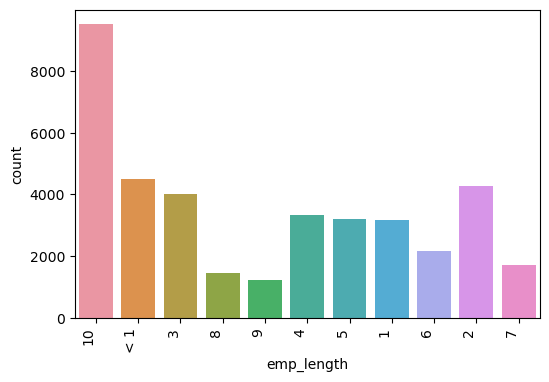

In [55]:
# Inspect distribution of employment length in the dataset
plt.figure(figsize=(6,4))
ax=sns.countplot(x='emp_length',data=df_final)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

##### Conclusion: Highest number of borrowers have employment of more that 10 years.

#### Inspect distribution of values under various numerical columns

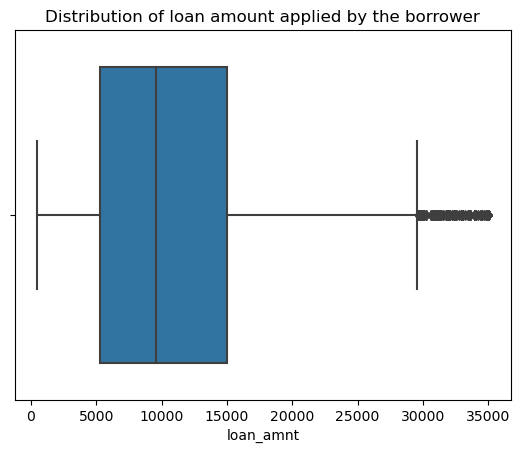

In [338]:
# Inspect distribution of loan amounts and presence of potential outliers
sns.boxplot(df_final['loan_amnt'])
plt.title('Distribution of loan amount applied by the borrower')
plt.show()

##### Conclusion: Distribution of loan amounts applied is highly positively skewed and outliers are present.

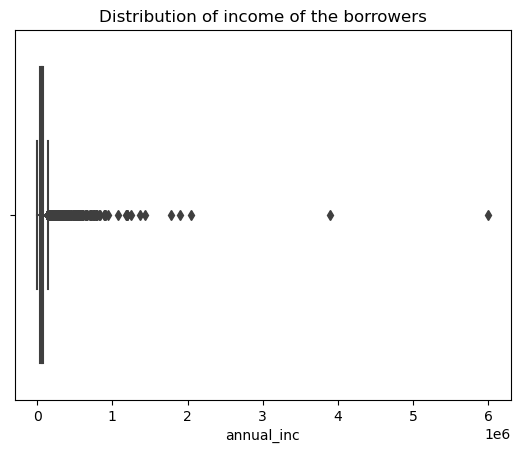

In [341]:
# Inspect distribution of income of the borrowers and potential outliers
sns.boxplot(df_final['annual_inc'])
plt.title('Distribution of income of the borrowers')
plt.show()

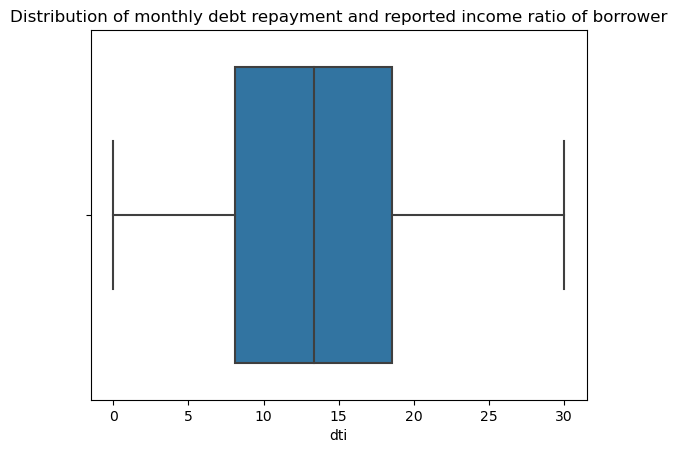

In [342]:
# Inspect distribution of monthly debt repayment to reported income ratio
sns.boxplot(df_final['dti'])
plt.title('Distribution of monthly debt repayment and reported income ratio of borrower')
plt.show()

#### New variable introduction: Funded amount (funded_amnt) to annual income (annual_inc) ratio

Text(0.5, 1.0, 'Distribution of funded loan to annual income ratio')

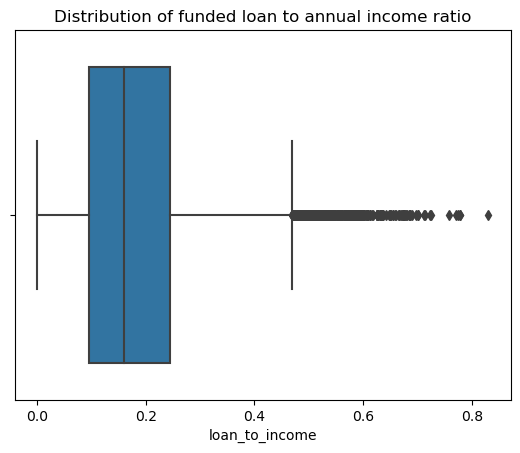

In [344]:
# Creating derived metric for better interpretation: Loan to income ratio
df_final['loan_to_income']= df_final['funded_amnt']/df_final['annual_inc']
sns.boxplot(df_final['loan_to_income'])
plt.title('Distribution of funded loan to annual income ratio')

##### Conclusion: Distribution of loan to income ratio is positively skewed and outliers are present.

#### New variable introduction: Funded amount (funded_amnt) to Requested amount (loan_amnt) ratio

Text(0.5, 1.0, 'Distribution of Loan funded to Loan requested ratio')

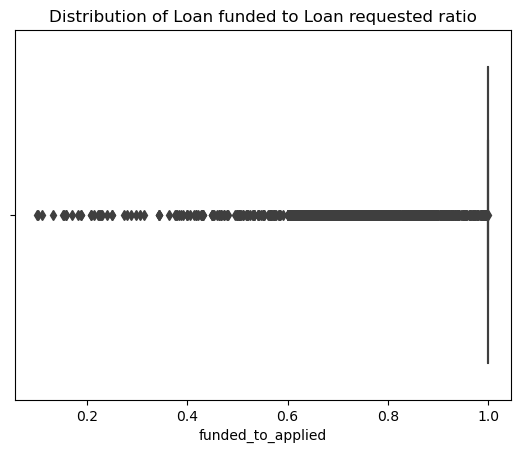

In [345]:
# Creating derived metric for better interpretation: Funded amount to Applied amount ratio
df_final['funded_to_applied']=df_final['funded_amnt']/df_final['loan_amnt']
sns.boxplot(df_final['funded_to_applied'])
plt.title('Distribution of Loan funded to Loan requested ratio')

In [346]:
df_final.shape

(38577, 37)

### Bivariate Analysis
#### Explore relationship of various variables with independent variable

In [349]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               38577 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  int64  
 14  purpose               

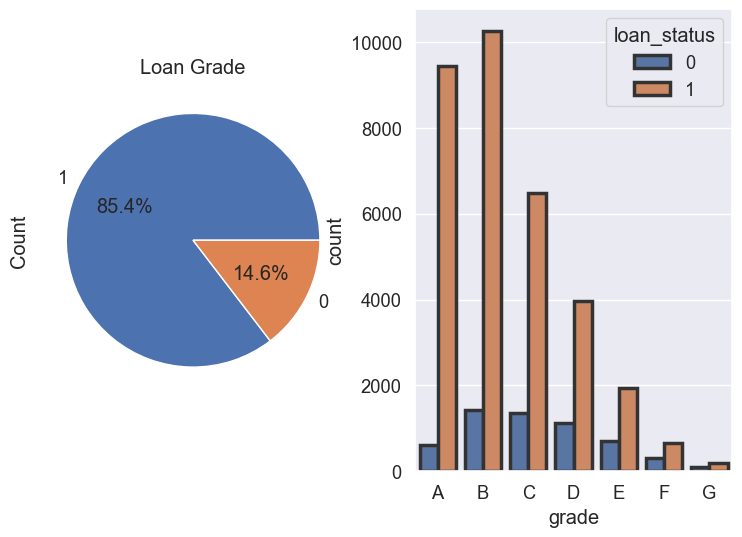

In [114]:
# Explore variable 'Loan Grade' (grade) against the dependant variable (loan_status)
fig_Grade,ax=plt.subplots(1,2,figsize=(9,6))
df_final['loan_status'].value_counts().plot.pie(ax=ax[0],explode=None,shadow=False,autopct='%1.1f%%')
ax[0].set_title('Loan Grade')
ax[0].set_ylabel('Count')
sns.countplot('grade',hue='loan_status',linewidth=2.5,edgecolor=".2",data=df_final,ax=ax[1])
plt.ioff()
fig_Grade

##### Conclusion: Loans from Grade C, D, E, F and G show comparitively higher proportion of default.

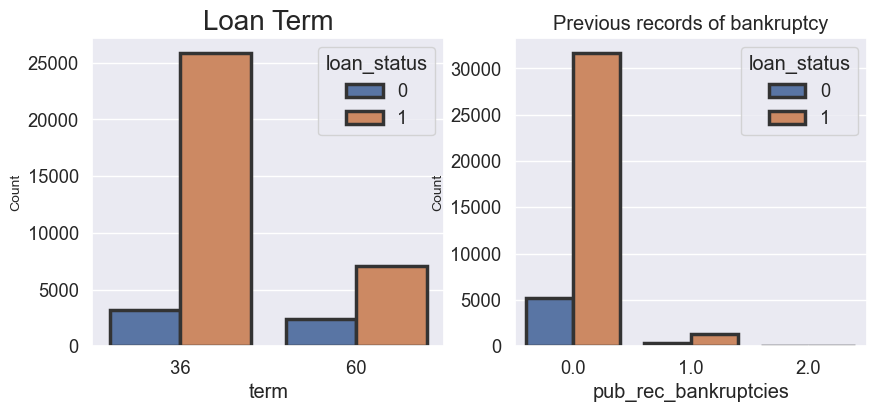

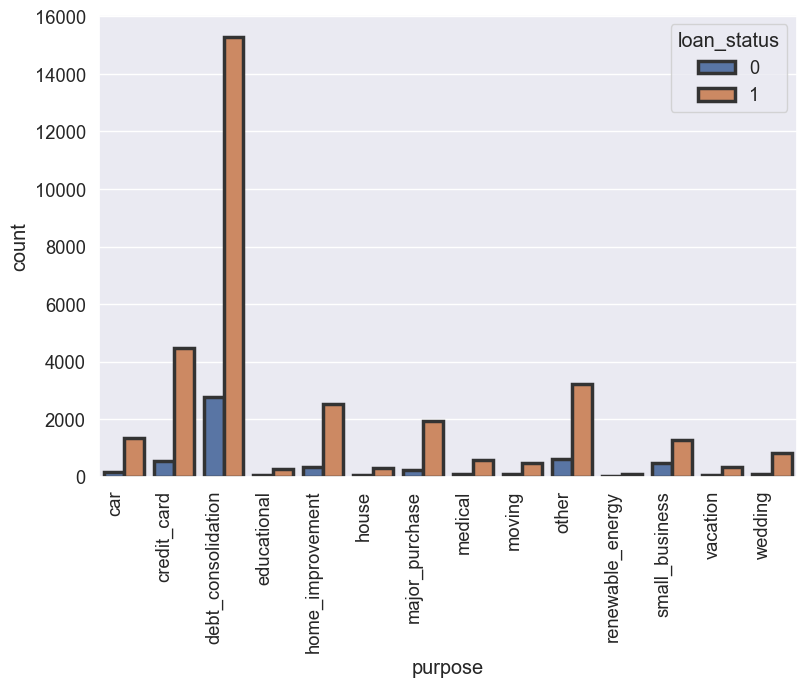

In [113]:
# Explore variable 'Purpose of loan' (pupose) against the dependant variable (loan_status)
plt.figure(figsize=(9,6))
ax=sns.countplot('purpose',hue='loan_status',linewidth=2.5,edgecolor=".2",data=df_final)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

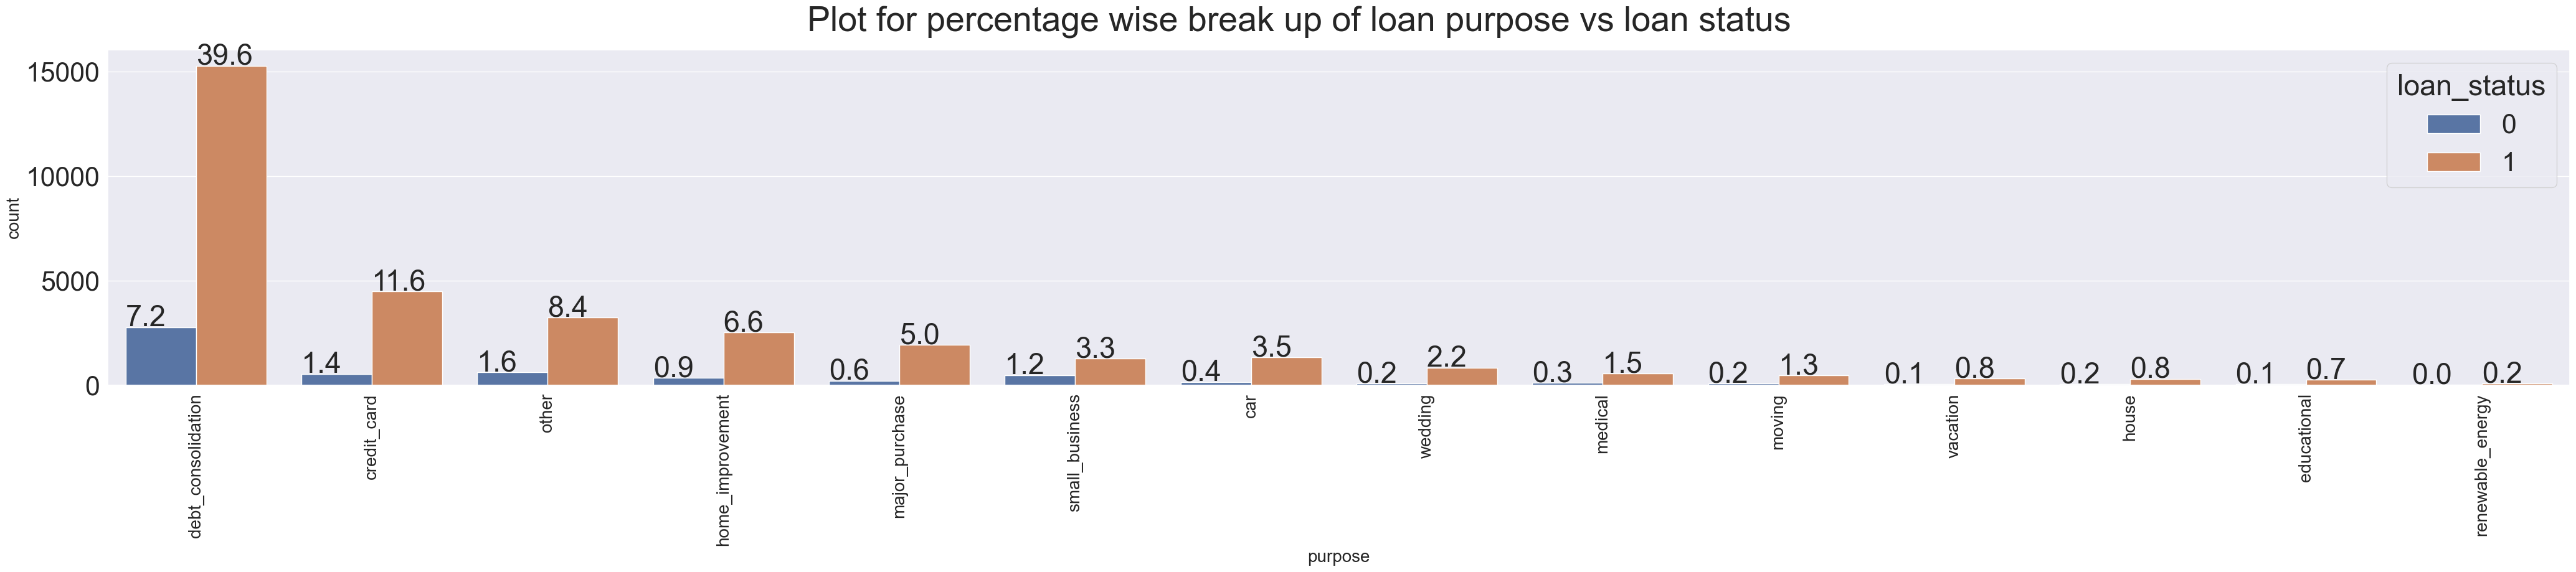

In [100]:
# Univariate analysis for categorical variable purpose_of_loan

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(40,20))

width_of_each_cat = len(df_final['purpose'].unique()) + 35 + len(df_final['loan_status'].unique())
fig.set_size_inches(width_of_each_cat , 7)
plt.xticks(rotation=90)
sns.set(font_scale=2.8)
ax = sns.countplot(data = df_final, x= 'purpose', order=df_final['purpose'].value_counts().index,hue = 'loan_status') 
fig.suptitle("Plot for percentage wise break up of loan purpose vs loan status",fontsize = 40)
for an in ax.patches:
                if(np.isnan(an.get_height())==False):
                 ax.annotate('{:1.1f}'.format((an.get_height()*100)/float(len(df_final))), (an.get_x(),an.get_height()+50))

#We can see most loan charged off in debt_consolidation purpose
ax.xaxis.set_tick_params(labelsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
fig

##### Conclusion: Proportion of loan defaults is relatively higher under debt consolidation and credit card categories.

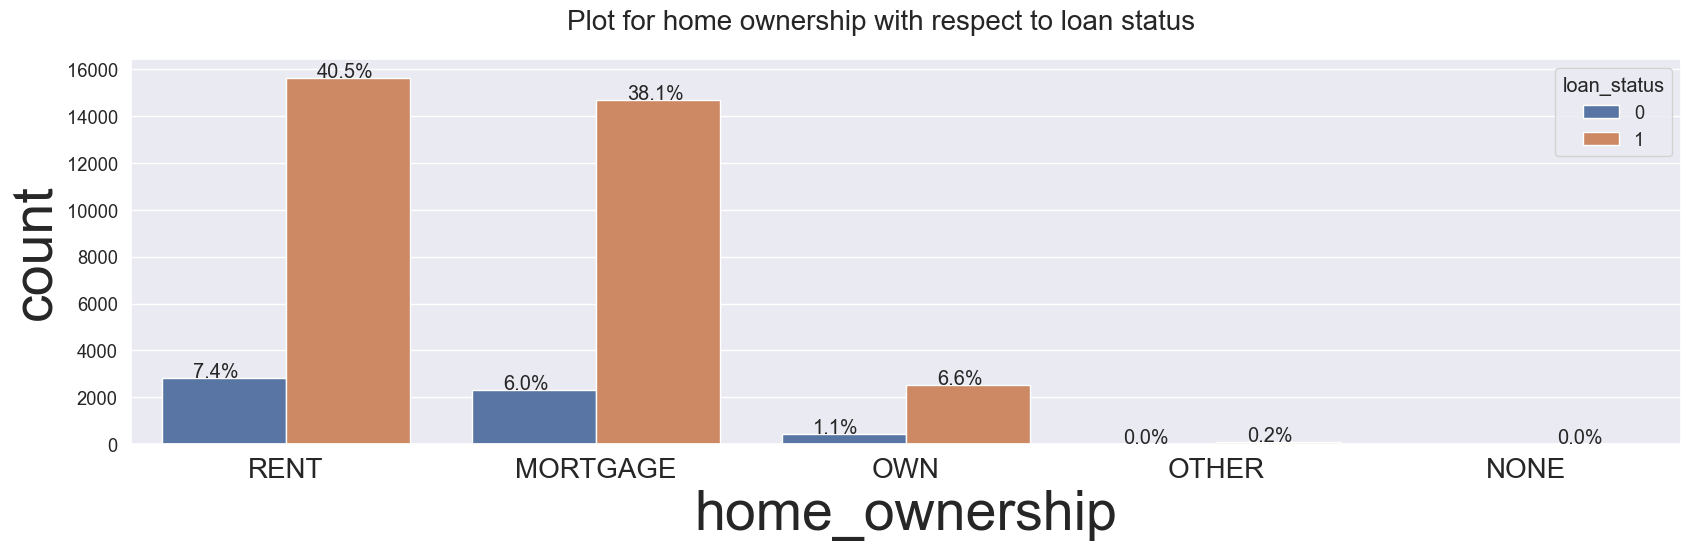

In [103]:
#Univariate analysis for categorical variable for home_ownership

fig,ax=plt.subplots(figsize=(20,5))

ax = sns.countplot(data = df_final, x= 'home_ownership', order=df_final['home_ownership'].value_counts().index,hue = 'loan_status') 
sns.set(font_scale=1.2)
fig.suptitle("Plot for home ownership with respect to loan status",fontsize=20)
for an in ax.patches:
                if(np.isnan(an.get_height())==False):
                 ax.annotate('{:2.1f}%'.format((an.get_height()*100)/float(len(df_final))), (an.get_x()+0.10, an.get_height()+30))   
ax.xaxis.set_tick_params(labelsize=20)
ax.xaxis.label.set_size(40)
ax.yaxis.label.set_size(40)
fig

##### Conclusion: Proportion of loan defaults is relatively higher if applicant has rented home or mortgage.

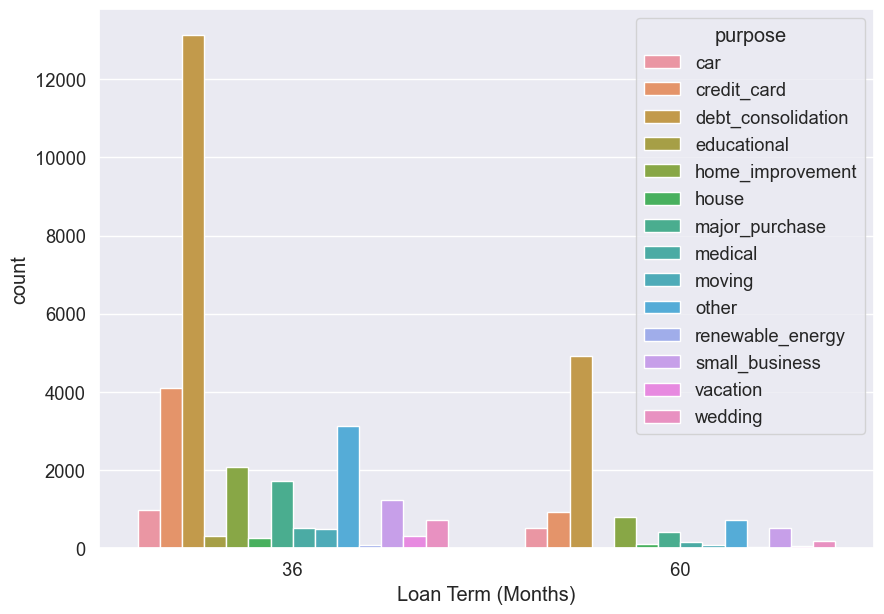

In [108]:
# Plot showing counts of loans with multiple categorical variables (term and purpose of loan)
plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='purpose', data=df_final)
plt.xlabel('Loan Term (Months)')
plt.show()

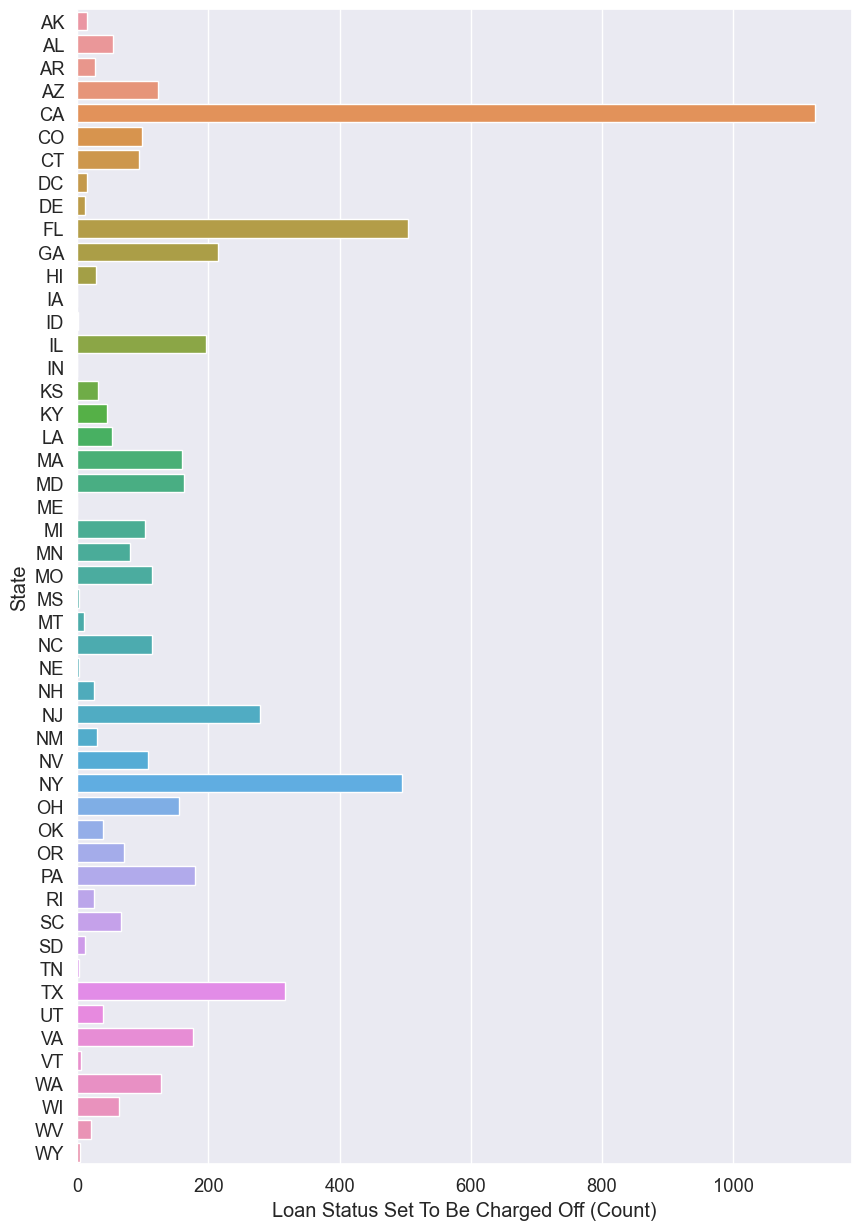

In [111]:
# State-wise count of the defaulters
g = df_final[df_final['loan_status']==0].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,15))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Loan Status Set To Be Charged Off (Count)')
plt.ylabel('State')
plt.show()

##### Conclusion: Number of loan defaulters is highest in California (CA), followed by NewYork (NY) and Florida (FL).

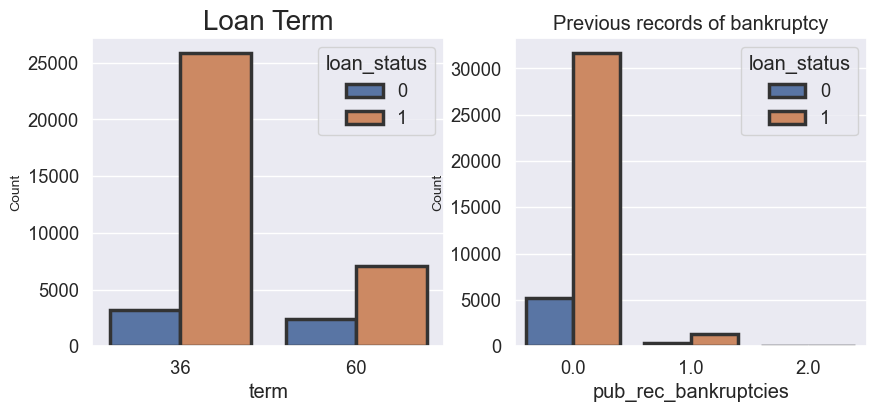

In [112]:
# Explore variables 'Term of loan' (term) and 'Previous records of bankruptcy' (pub_rec_bankruptcies) against the dependant variable (loan_status)
fig_term_record,ax=plt.subplots(1,2,figsize=(10,4))
sns.countplot('term',hue='loan_status',linewidth=2.5,edgecolor=".2",data=df_final,ax=ax[0])
ax[0].set_title('Loan Term',fontsize=20)
ax[0].set_ylabel('Count',fontsize=10)
sns.countplot('pub_rec_bankruptcies',hue='loan_status',linewidth=2.5,edgecolor=".2",data=df_final,ax=ax[1])
ax[1].set_title('Previous records of bankruptcy')
ax[1].set_ylabel('Count',fontsize=10)
plt.ioff()
fig_term_record

##### Conclusion: Proportion of loan defaults is relatively higher in case of long term tenor (60 months) or in case borrower has previous record of bankruptcy.

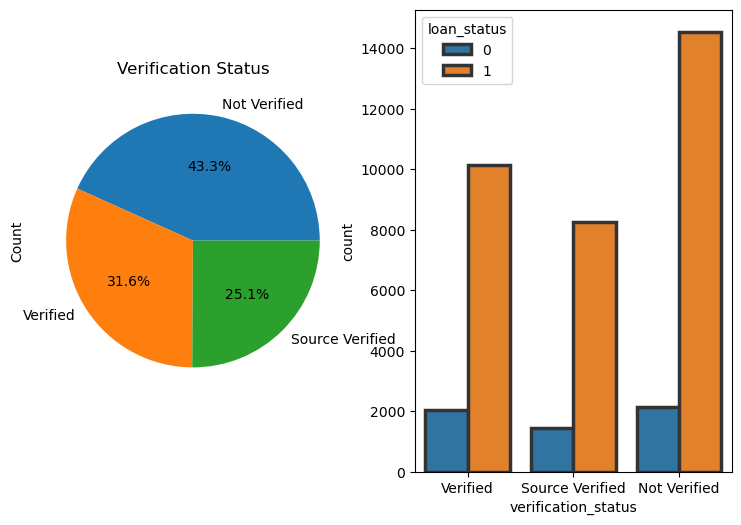

In [392]:
# Explore variable 'Loan Grade' (grade) against the dependant variable (loan_status)
fig_Verification,ax=plt.subplots(1,2,figsize=(9,6))
df_final['verification_status'].value_counts().plot.pie(ax=ax[0],explode=None,shadow=False,autopct='%1.1f%%')
ax[0].set_title('Verification Status')
ax[0].set_ylabel('Count')
sns.countplot('verification_status',hue='loan_status',linewidth=2.5,edgecolor=".2",data=df_final,ax=ax[1])
plt.ioff()
fig_Verification

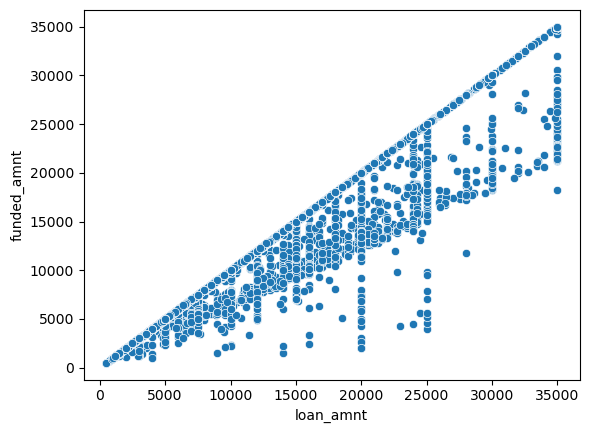

In [403]:
# Explore relationship between laon amount requested and loan amount committed
sns.scatterplot(x='loan_amnt',y='funded_amnt',data=df_final)
plt.show()

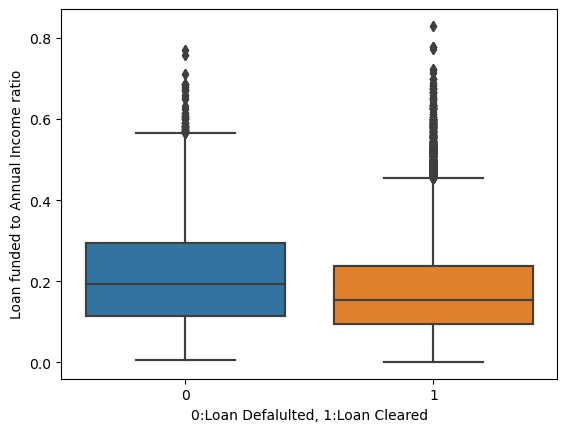

In [410]:
# Inspect distibution of laon to income ratio in defaulted and cleared loans
sns.boxplot(data=df_final,x='loan_status',y='loan_to_income')
plt.xlabel('0:Loan Defalulted, 1:Loan Cleared')
plt.ylabel('Loan funded to Annual Income ratio')
plt.show()

##### Conclusion: Median of loan to income ratio is comparitively higher for defaulters

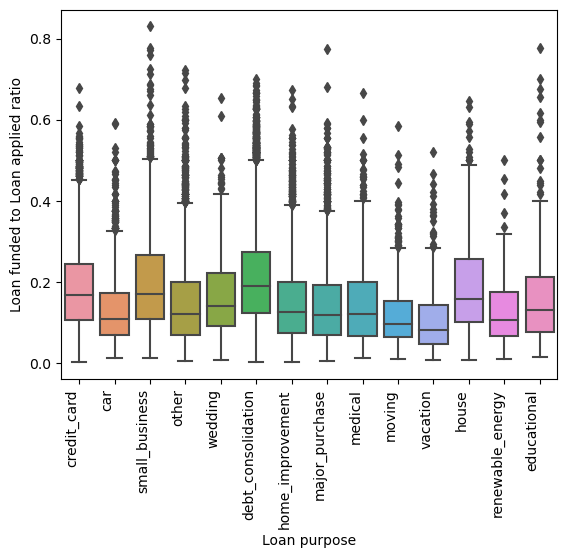

In [415]:
# Inspect distibution of laon to income ratio in defaulted and cleared loans
ax= sns.boxplot(data=df_final,x='purpose',y='loan_to_income')
plt.xlabel('Loan purpose')
plt.ylabel('Loan funded to Loan applied ratio')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

##### Conclusion: Median of loan to income ratio is relatively higher for the applicants who have borrowed for the purpose of loan consolidation or credit cards.

### Multivariate Analysis
#### Explore relationship of multiple variables with one another

In [416]:
# Create a list of Numerical Variables from the dataframe
variable_num = df_final.describe().columns.to_list()
print(variable_num)
print(len(variable_num))

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies', 'loan_to_income', 'funded_to_applied']
24


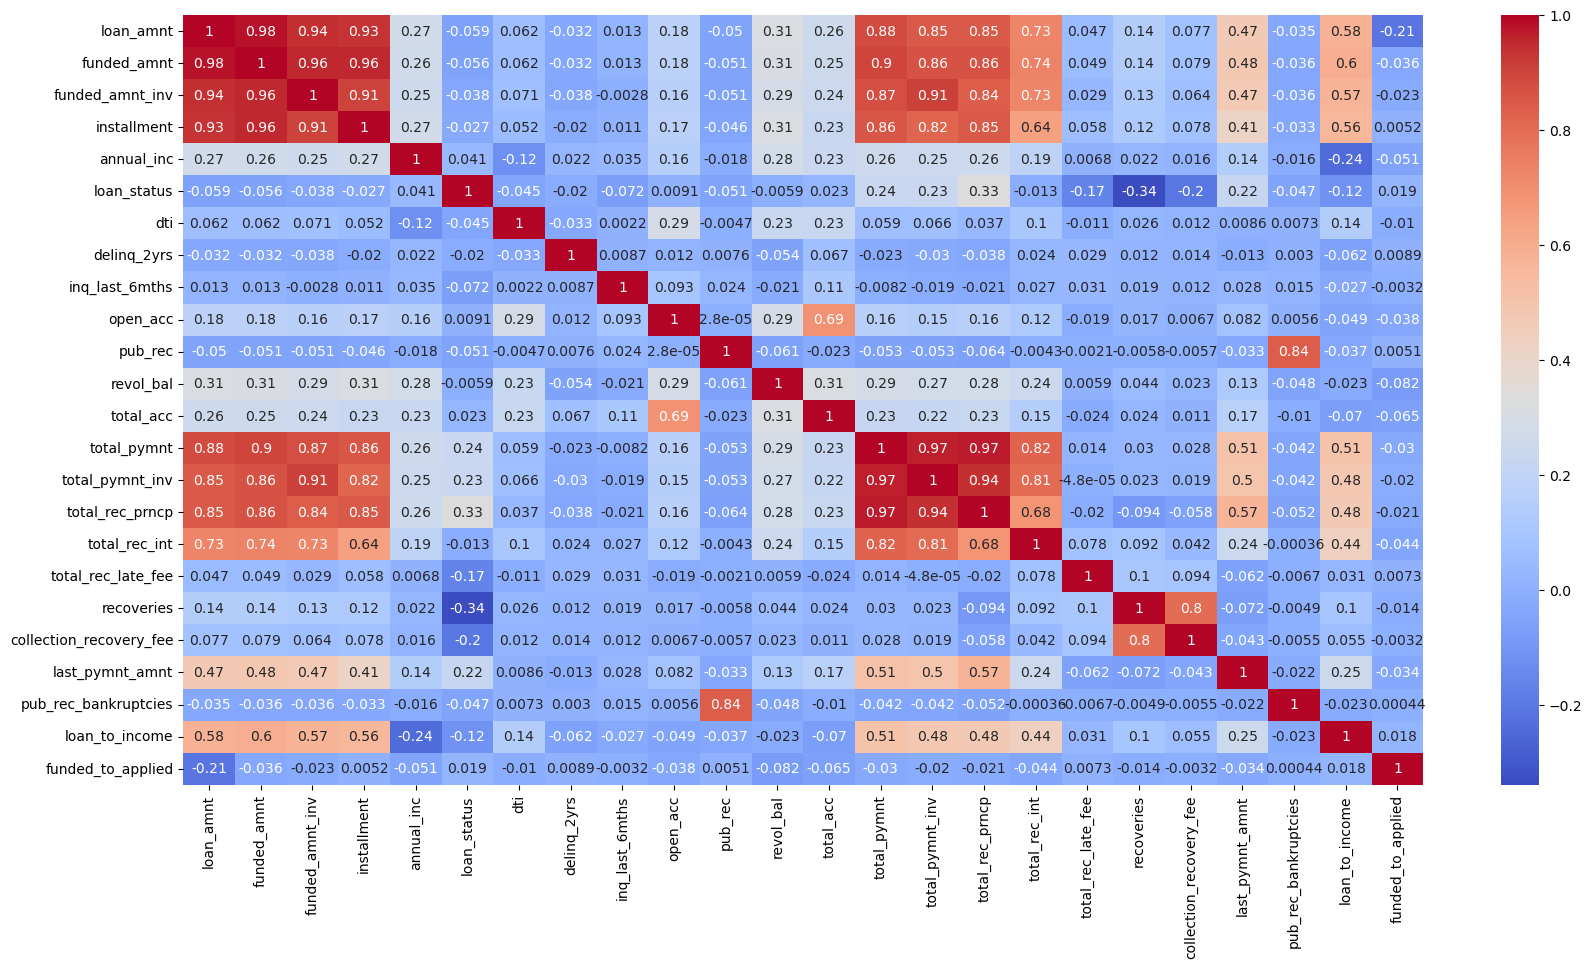

In [417]:
# Plot heatmap for depicting corrlation between numerical varibales identified above
df_variable_num = df_final[variable_num]
plt.figure(figsize=(20,10))
sns.heatmap(df_variable_num.corr(),cmap='coolwarm',annot=True)
plt.show()